# MARATÓN BEHIND THE CODE 2020

# DESAFÍO 8 - Digital House

El reto de Digital House tiene que ver con la misión y visión de la empresa; la cual busca transformar la vida de las personas, desarrollando competencias digitales, para que generen un impacto positivo en la sociedad. En ese sentido, Digital House busca a través de este desafío medir la empleabilidad de los cursos que disponibiliza en su plataforma, es decir que tan factible es que un alumno o egresado de Digital House acceda al mercado laboral o consiga un trabajo en su área luego de finalizar uno o varios de los cursos ofrecidos en la plataforma.

Entender que características o variables hacen que una persona sea más o menos empleable es fundamental para la empresa y para generar ese impacto positivo que busca aportar a la sociedad

<hr>

## Instalación de algunas bibliotecas de Python

In [1]:
!pip install scikit-learn --upgrade
!pip install scipy --upgrade

/bin/bash: pip: command not found
/bin/bash: pip: command not found


In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, Normalizer
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold, cross_validate, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.svm import SVC

<hr>

## Descargue el conjunto de datos del desafío en formato .csv

In [3]:
import pandas as pd

!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
df_training_dataset = pd.read_csv(r'train_dataset_digitalhouse.csv')
df_training_dataset.tail()

--2020-09-18 17:38:07--  https://raw.githubusercontent.com/vanderlei-test/654986294958/master/train_dataset_digitalhouse.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.204.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.204.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 654532 (639K) [text/plain]
Saving to: ‘train_dataset_digitalhouse.csv.5’

train_dataset_digit 100%[===================>] 639.19K   460KB/s    in 1.4s    

2020-09-18 17:38:09 (460 KB/s) - ‘train_dataset_digitalhouse.csv.5’ saved [654532/654532]



,Unnamed: 0,EDAD,GENERO,RESIDENCIA,NV_ESTUDIO,ESTUDIO_PREV,TRACK_DH,AVG_DH,MINUTES_DH,EXPERIENCIA,DIAS_EMP
8990,9995,29.0,MASCULINO,ARGENTINA,TERTIARY,DEVELOPMENT,NaN,4.0,4701.6,9.1,86.0
8991,9996,34.0,NaN,ARGENTINA,UNIVERSITARY,ENGINEERING,PROGRAMACION,3.4,4646.2,16.8,95.0
8992,9997,28.0,FEMENINO,ARGENTINA,POST_GRADUATE,ENGINEERING,EJECUTIVO,NaN,3315.1,5.6,95.0
8993,9998,23.0,MASCULINO,MEXICO,TERTIARY,ENGINEERING,PROGRAMACION,3.3,4437.8,0.9,87.0
8994,9999,36.0,MASCULINO,ARGENTINA,UNIVERSITARY,COMMERCIAL,DATA,3.4,4600.8,19.6,88.0


## En el conjunto de datos proporcionado, tenemos las siguientes columnas:

* Unnamed: 0
* EDAD
* GENERO
* RESIDENCIA
* NV_ESTUDIO
* ESTUDIO_PREV
* TRACK_DH
* AVG_DH
* MINUTES_DH
* EXPERIENCIA
* **DIAS_EMP = El valor "target" que se va a predecir**

Podemos verificar fácilmente que faltan valores usando el siguiente código:

```df_training_dataset.info()```

Debe manejar cuidadosamente estos valores faltantes antes de crear un modelo de regresión.

In [4]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8995 non-null   int64  
 1   EDAD          7668 non-null   float64
 2   GENERO        7620 non-null   object 
 3   RESIDENCIA    7638 non-null   object 
 4   NV_ESTUDIO    7623 non-null   object 
 5   ESTUDIO_PREV  7665 non-null   object 
 6   TRACK_DH      7714 non-null   object 
 7   AVG_DH        7651 non-null   float64
 8   MINUTES_DH    7619 non-null   float64
 9   EXPERIENCIA   7618 non-null   float64
 10  DIAS_EMP      8995 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 773.1+ KB


## Historgrama de varibales

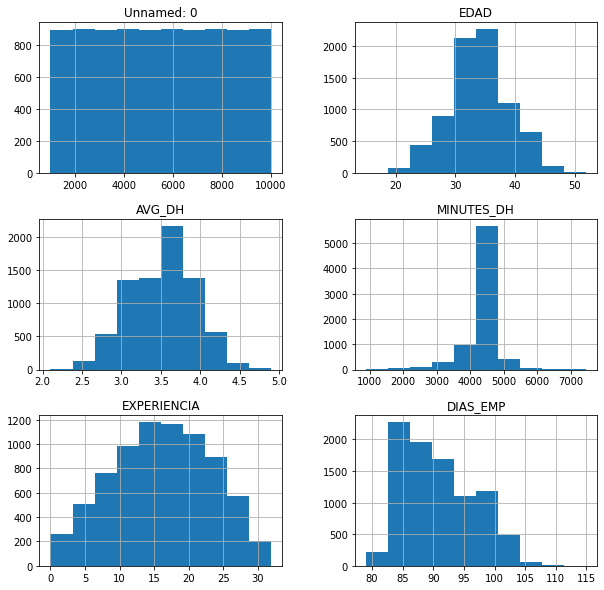

In [5]:
hist = df_training_dataset.hist(figsize=(10,10))

### Parametros del Entorno

In [6]:
semilla_aleatoria = 1234
umbral_categoria = 10
umbral_correlacion = 0.6
pd.options.display.max_columns=21
columna_target = 'DIAS_EMP'
categorias_target = []

In [7]:
def obtener_frecuencia_columnas(df_temp):
    columnas_con_frecuencia = [] 
    categorias_target=[]
    for columna in df_temp.columns:    
        df_frecuencia_cat=df_temp.groupby([columna],as_index=False).size()
        
        if len(df_frecuencia_cat)<umbral_categoria:
            if columna != columna_target:
                columnas_con_frecuencia.append(columna)
            else:
                categorias_target = df_frecuencia_cat[columna].values                
            print(df_frecuencia_cat)
    return columnas_con_frecuencia, categorias_target
columnas_categoricas, categorias_target = obtener_frecuencia_columnas(df_training_dataset)
print("Columnas con frecuencias: ",columnas_categoricas)
print("Categorias target: ",categorias_target)

      GENERO  size
0   FEMENINO  2390
1  MASCULINO  5230
  RESIDENCIA  size
0  ARGENTINA  4843
1     BRAZIL  1667
2     MEXICO  1128
      NV_ESTUDIO  size
0  POST_GRADUATE   980
1       TERTIARY  1762
2   UNIVERSITARY  4881
  ESTUDIO_PREV  size
0     BUSINESS   203
1   COMMERCIAL  2077
2  DEVELOPMENT  1427
3  ENGINEERING  3850
4    MARKETING   108
       TRACK_DH  size
0          DATA  3464
1     EJECUTIVO   698
2     MARKETING   519
3  PROGRAMACION  3033
Columnas con frecuencias:  ['GENERO', 'RESIDENCIA', 'NV_ESTUDIO', 'ESTUDIO_PREV', 'TRACK_DH']
Categorias target:  []


## Hallar todas las correlaciones existentes entre las variables numéricas del conjunto de datos

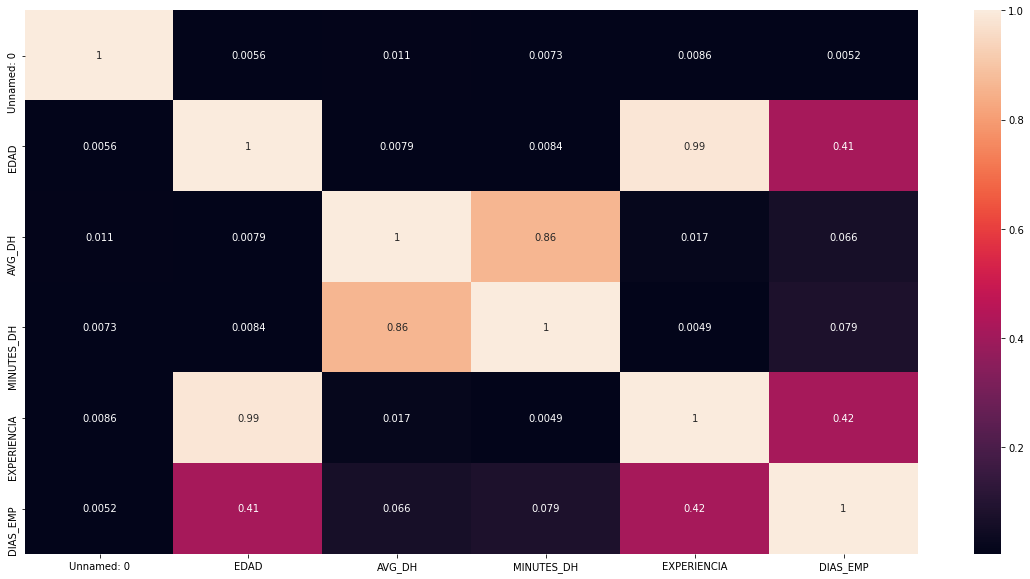

In [8]:
def graficar_correlaciones(df_temp):
    var_num = df_temp._get_numeric_data().columns.values.tolist()
    plt.figure(figsize = (20, 10))
    sns.heatmap(df_temp[var_num].corr().abs(), annot = True)
    
graficar_correlaciones(df_training_dataset)

In [9]:
def mostrar_correlaciones(df_temp):
    var_num = df_temp._get_numeric_data().columns.values.tolist()
    df_cols = df_temp[var_num].corr().stack().reset_index()
    df_cols.columns = ['VariableA','VariableB','correlation']
    df_corr = df_cols[(df_cols['correlation']>0.6)&(df_cols['correlation']!=1)]
    display(df_corr)
mostrar_correlaciones(df_training_dataset)

,VariableA,VariableB,correlation
10,EDAD,EXPERIENCIA,0.986745
15,AVG_DH,MINUTES_DH,0.863842
20,MINUTES_DH,AVG_DH,0.863842
25,EXPERIENCIA,EDAD,0.986745


In [10]:
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primero copiamos el dataframe de datos de entrada 'X'
        data = X.copy()
        # Devolvemos un nuevo dataframe de datos sin las columnas no deseadas
        return data.drop(labels=self.columns, axis='columns')
    
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
class DataScaleImputer(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df_temp = X.copy()
        features = df_temp.columns.drop(self.columns)
        transformer = ColumnTransformer(transformers=[('scaler',Normalizer(),features.values)])
        X_transform = transformer.fit_transform(df_temp[features.values])
        X_imputed_df = pd.DataFrame(data = X_transform, index = X.index, columns = features.values)        
        return pd.concat([df_temp[self.columns],X_imputed_df],axis=1)
    
class DataLabelEncoderTransform(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X):
        return self
    
    def transform(self, X):    
        df_temp = X.copy()
        features = df_temp.columns.drop(self.columns)
        encoder = LabelEncoder()        
        df_encoder= df_temp[self.columns].apply(encoder.fit_transform)             
        return pd.concat([df_temp[features],df_encoder],axis=1)
    
class DataOneHotEncoderTransform(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):                
        return pd.get_dummies(X, columns=self.columns)   

In [11]:
def validar_nulos(df_temp):
    print(df_temp.shape)
    print("Valores nulos del df_training_dataset despues de la transformación DropNA: \n\n{}\n".format(df_temp.isnull().sum(axis = 0)))

In [12]:
df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['AVG_DH', 'MINUTES_DH','EXPERIENCIA','EDAD'])
validar_nulos(df_training_dataset)

(4666, 11)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

Unnamed: 0        0
EDAD              0
GENERO          713
RESIDENCIA      688
NV_ESTUDIO      693
ESTUDIO_PREV    696
TRACK_DH        637
AVG_DH            0
MINUTES_DH        0
EXPERIENCIA       0
DIAS_EMP          0
dtype: int64



In [13]:
df2 = DataFrameImputer().fit_transform(df_training_dataset)
validar_nulos(df2)

(4666, 11)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

Unnamed: 0      0
EDAD            0
GENERO          0
RESIDENCIA      0
NV_ESTUDIO      0
ESTUDIO_PREV    0
TRACK_DH        0
AVG_DH          0
MINUTES_DH      0
EXPERIENCIA     0
DIAS_EMP        0
dtype: int64



In [14]:
columnas_encoder =  [v for v in columnas_no_numericas if v not in [columna_target] ]
df3 = DataLabelEncoderTransform(columns=columnas_encoder).fit_transform(df2)
validar_nulos(df3)

NameError: name 'columnas_no_numericas' is not defined

In [ ]:
def graficar_carateristicas(df_temp,col_target):
    for feature in df_temp.columns.values:
        if feature != col_target:
            sns.jointplot(x=feature,y=col_target,data=df_temp,color='c')
graficar_carateristicas(df3,columna_target)

In [ ]:
df4 = DataScaleImputer(columns=columnas_no_numericas).fit_transform(df3)
validar_nulos(df4)

In [ ]:
graficar_carateristicas(df4,columna_target)

In [ ]:
columnas_numericas = df_training_dataset._get_numeric_data().columns.values.tolist()
columnas = df_training_dataset.columns.values.tolist()
columnas_no_numericas = [v for v in columnas if v not in columnas_numericas]
print(columnas_numericas)
print(columnas_no_numericas)

<hr>

## Algunos consejos antes de entrenar a un modelo:

1. Manejar valores perdidos

2. Manejar variables categóricas

<hr>

## A continuación, le brindamos una plantilla simple para que sepa cómo estructurar las entradas y salidas de su modelo

### Removiendo columnas

### Removendo valores NaN

In [ ]:
df_training_dataset_2 = df_training_dataset_1.dropna()
df_training_dataset_2.tail()

In [ ]:
df5 = DropColumns(columns=['Unnamed: 0','EDAD','EXPERIENCIA']).fit_transform(df2)
validar_nulos(df5)

### Codificando variables categóricas

In [ ]:
# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies`` (demontración)
#df_training_dataset_3 = pd.get_dummies(df_training_dataset_2, columns=['GENERO','RESIDENCIA','NV_ESTUDIO','NV_ESTUDIO','TRACK_DH','ESTUDIO_PREV'])
#df_training_dataset_3.tail()

carateristicas_encoder = ['GENERO','RESIDENCIA','NV_ESTUDIO','TRACK_DH','ESTUDIO_PREV']
df_training_dataset_3 = DataOneHotEncoderTransform(columns=carateristicas_encoder).fit_transform(df5)
#df_training_dataset_3 = df5
validar_nulos(df_training_dataset_3)

### Seleccionando las columnas "features" y "target"

In [ ]:
df_training_dataset_3.columns

In [ ]:
columnas_modelo = [v for v in df_training_dataset_3.columns if v not in ['DIAS_EMP']]
print(columnas_modelo)
features = df_training_dataset_3[columnas_modelo
]

target = df_training_dataset_3['DIAS_EMP']  ## NO CAMBIE EL NOMBRE DE LA VARIABLE "target".

### Dividiendo el conjunto de datos para una "prueba ciega"

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)

### Entrenando un modelo de regresión lineal simple

In [ ]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression().fit(X_train, y_train)

### Evaluando el modelo de regresión con el método  "score()" de sklearn

In [ ]:
regression_model.score(X_test, y_test)

In [ ]:
def graficar_r2_scores(estimator, train_x, train_y,test_x,test_y,nparts=5,jobs=None):
    kfold = KFold(n_splits=nparts,shuffle=True, random_state=semilla_aleatoria)
    fig,axes = plt.subplots(figsize=(7, 3))
    axes.set_title("R2/Nro. Fold")
    axes.set_xlabel("Nro. Fold")
    axes.set_ylabel("R2")    
    train_scores = cross_val_score(estimator, train_x, train_y, cv = kfold, n_jobs=jobs,scoring="r2")
    test_scores = cross_val_score(estimator, test_x, test_y, cv = kfold, n_jobs=jobs,scoring="r2")        
    train_sizes = range(1,nparts+1,1)    
    axes.grid()    
    axes.plot(train_sizes, train_scores, 'o-', color="r",label="Datos Entrenamiento")
    axes.plot(train_sizes, test_scores, 'o-', color="g",label="Validacion Cruzada")
    axes.legend(loc="best")
    return train_scores

In [ ]:
graficar_r2_scores(regression_model,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

In [ ]:
reg_rndforest = RandomForestRegressor(n_estimators=100)
reg_rndforest.fit(X_train, y_train)

In [ ]:
reg_rndforest.score(X_test, y_test)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
fs = SelectFromModel(RandomForestRegressor(n_estimators=1000),max_features=2)
fs.fit(X_train,y_train)
X_tr = fs.transform(X_train);
X_te = fs.transform(X_test);#get the features from X determined by fs
 
#Use our selected model to fit the selected x = X_fs
model = model = LinearRegression()

 
fitted = model.fit(X_tr,y_train)
yhat = model.predict(X_te)
 


In [ ]:
from sklearn.metrics import accuracy_score
model.score(X_te, y_test)

In [ ]:
from sklearn.linear_model import ElasticNet, LassoLars, Ridge, LinearRegression, Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
poly = PolynomialFeatures(3)
x_train = poly.fit_transform(X_train)
x_dev = poly.fit_transform(X_test)

clf = LinearRegression()
clf.fit(x_train,y_train)

In [ ]:
clf.score(x_dev, y_test)

In [ ]:
# Initialising the ANN
model = keras.Sequential()

# Adding the input layer and the first hidden layer
model.add(layers.Dense(64, activation = 'relu', input_dim = 6))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(units = 1))

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose=0)

y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test,
                            batch_size=2)
print('Test score:', score)

<hr>

## Completar los datos necesarios para entregar la solución

### Como entrega de su solución, esperamos los resultados numéricos predichos por su modelo. Como entrada utilizará el archivo "to_be_scored.csv"

In [ ]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/654986294958/master/to_be_scored_digitalhouse.csv
df_to_be_scored = pd.read_csv(r'to_be_scored_digitalhouse.csv')
df_to_be_scored.tail()

# ¡Atención!

### El marco de datos ``to_be_scored`` es su "hoja de evaluación". Tenga en cuenta que la columna "target" no existe en esta muestra, por lo que no se puede utilizar para modelos de entrenamiento basados en el aprendizaje supervisado.

# ¡Atención!

### Debes realizar los mismos pasos de procesamiento previo que hiciste en el conjunto de datos de entrenamiento antes de calificar la "hoja de respuestas"

In [ ]:
df_to_be_scored_1 = df_to_be_scored.drop(columns=['Unnamed: 0', 'RESIDENCIA', 'NV_ESTUDIO', 'ESTUDIO_PREV', 'TRACK_DH'], inplace=False)

df_to_be_scored_2 = df_to_be_scored_1.dropna()

df_to_be_scored_3 = pd.get_dummies(df_to_be_scored_2, columns=['GENERO'])
df_to_be_scored_3.tail()

In [ ]:
df_to_be_scored_3.columns

<hr>

### Hacer las predicciones con el método "predict()" de sklearn y agregar los resultados en el marco de datos de la "hoja de evaluación"

In [ ]:
y_pred = regression_model.predict(df_to_be_scored_3)
df_to_be_scored_3['target'] = y_pred
df_to_be_scored_3.tail()

# ¡Atención!

### La columna agregada con los resultados debe llamarse "target", de lo contrario, su envío fallará.

<hr>

### Exportar el marco de datos de resultados como un archivo .csv a su proyecto de Watson Studio.

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_3.to_csv(index=False))